# About Dataset
#### This dataset provides a comprehensive overview of potential loan applicants' profiles, specifically tailored for the Indian demographic. It encapsulates a range of features, from basic demographics to financial details, that can be instrumental in assessing the creditworthiness of an individual.

1. **Age**
    * **Type:** Integer
    * **Description:** Represents the age of the applicant. Indicates the applicant's maturity level.
    * **Range:** 18 to 70

2. **Gender**
    * **Type:** Categorical
    * **Description:** Gender of the applicant.
    * **Categories:** Male, Female, Other

3. **Income**
    * **Type:** Integer
    * **Description:** The applicant's income, which is critical in assessing their ability to repay the loan.
    * **Range:** Multiples of 1000's

4. **Credit Score**
    * **Type:** Integer
    * **Description:** A score quantifying the applicant's creditworthiness based on their credit history.
    * **Range:** 300 to 850

5. **Credit History Length**
    * **Type:** Integer
    * **Description:** Represents the number of months since the applicant's first credit line. Indicates the applicant's experience with credit management.
    * **Units:** Months

6. **Number of Existing Loans**
    * **Type:** Integer
    * **Description:** The number of loans the applicant currently has.
    * **Range:** 0 to 10

7. **Loan Amount**
    * **Type:** Integer
    * **Description:** The amount of money the applicant is requesting.
    * **Range:** 0 to 150,000

8. **Loan Tenure**
    * **Type:** Integer
    * **Description:** The number of months the applicant wants to repay the loan over.
    * **Units:** Months

9. **Existing Customer**
    * **Type:** Categorical
    * **Description:** Whether the applicant is an existing customer of the finance company.
    * **Categories:** Yes, No

10. **State**
    * **Type:** Categorical
    * **Description:** The state in India where the applicant resides.
    * **Categories:** Maharashtra, Delhi, Karnataka, Tamil Nadu, West Bengal, Uttar Pradesh, Gujarat, Rajasthan, Kerala, Telangana, etc.

11. **City**
    * **Type:** Categorical
    * **Description:** The city or village in India where the applicant resides.
    * **Categories:** Mumbai, Pune, New Delhi, Bengaluru, Chennai, Kolkata, Ahmedabad, Jaipur, Kochi, Hyderabad, and various villages.

12. **LTV Ratio**
    * **Type:** Float
    * **Description:** The loan-to-value ratio, represents the ratio of the loan amount to the appraised value of the asset (typically a house). Higher LTVs can indicate higher risk.
    * **Range:** 40% to 95%

13. **Employment Profile**
    * **Type:** Categorical
    * **Description:** General employment category of the applicant.
    * **Categories:**: Salaried, Self-Employed, Freelancer, Unemployed, Student

14. **Occupation**
    * **Type:** Categorical
    * **Description:** Specific occupation or job title of the applicant.
    * **Categories:** Software Engineer, Doctor, Teacher, Business Owner, Writer, etc.

15. **Profile Score**
    * **Type:** Integer
    * **Description:** A score ranging from 0 to 100 represents the overall profile of the applicant based on the actual loan repayment data. Higher values indicate better profiles.
    * **Range:** 0 to 100

# 1. Preliminary Data Analysis

## 1.1 Importing the libraries

In [2]:
#importing and pre-processing data
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector

#visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#training data 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb 
import lightgbm as ltb

#checking models accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#saving model
import joblib

## 1.2 Dataset

In [3]:
df=pd.read_csv("credit_data.csv")
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


We should make certain changes to _**customer_id**_ column:
  * Strip the str to make it an integer column for easy data processing.
  * Set it as index because it contains unique values and is not of much use in predicting the outcome.
  * Sort values according to the index.

## 1.3 Columns & thier Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

We have **three** different kinds of data types namely: 
* _object_
* _integer_ 
* _float_

Therefore, we need to convert all variables to the same datatype for classification.

## 1.3 Summary Statistics

In [5]:
df.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000
mean,44.005217,76499.163856,582.953773,307.965146,4.701693,105795.342773,133.340654,71.643101,77.350155
std,15.311051,42875.575193,163.076754,175.083268,2.980351,40458.370929,96.064132,16.865785,24.509196
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,42000.000000,446.000000,156.000000,2.000000,72173.000000,62.000000,58.105848,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111263.000000,100.000000,72.133017,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.239725,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


1. There is some **missing data** as counts are different.
2. There is **presence of outliers** in the dataset in various columns.
3. None of the numerical data has **normal distribution** which can be inferred by having a look at the 5 number summary given in the last 5 rows.

## 1.4 Missing values count.

In [6]:
nan_count = df.isna().sum()
print(nan_count)

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64


**Occupation** columns have _**missing values**_ which need to be handled.

# 2. Exploratory Data Analysis

## 2.1 Visualising categorical columns

### 2.1.1 Accoding to inbuilt functions.

**Filtering** out **categorcial** columns as **given** the datatypes.

In [7]:
cat_cols = make_column_selector(dtype_include=object) (df)
df[cat_cols].head()

,Gender,Existing Customer,State,City,Employment Profile,Occupation
0,Male,No,Karnataka,Mysuru,Salaried,Doctor
1,Male,No,Karnataka,Bengaluru,Salaried,Software Engineer
2,Other,Yes,Uttar Pradesh,Kanpur,Salaried,Banker
3,Female,Yes,Karnataka,Bengaluru,Self-Employed,Contractor
4,Male,No,Karnataka,Mysuru,Salaried,Teacher


#### 2.1.1.1 Gender

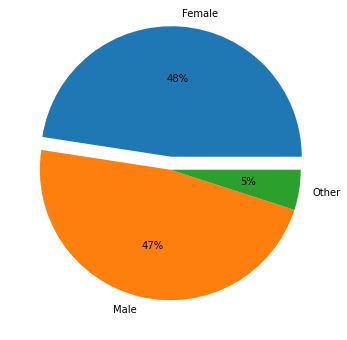

In [8]:
plt.figure(figsize=(10,6))
df_con=pd.DataFrame(data=df["Gender"].value_counts())
df_con=df_con.reset_index()
plt.pie(df_con["Gender"], labels=df_con["index"],explode=[0.1,0.0,0.0],autopct='%1.0f%%')
plt.show()

**"Other"** does **not** have **significant** values or contribution ot the dataset.
>There are equal amounts of female and male applicants for loan approval.

#### 2.1.1.2 Existing Customer

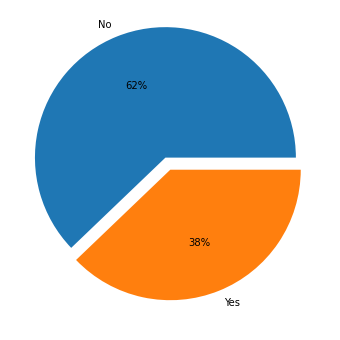

In [9]:
plt.figure(figsize=(10,6))
df_con=pd.DataFrame(data=df["Existing Customer"].value_counts())
df_con=df_con.reset_index()
plt.pie(df_con["Existing Customer"], labels=df_con["index"],explode=[0.1,0.0],autopct='%1.0f%%')
plt.show()

**Most** of the applicans are **not** an existing customer.
> It reflects that people who are not an existing customer of the bank still have high chances of loan being approved which is a plus point for the society as it benifits everyone.

#### 2.1.1.3 State

<AxesSubplot:xlabel='State', ylabel='Count'>

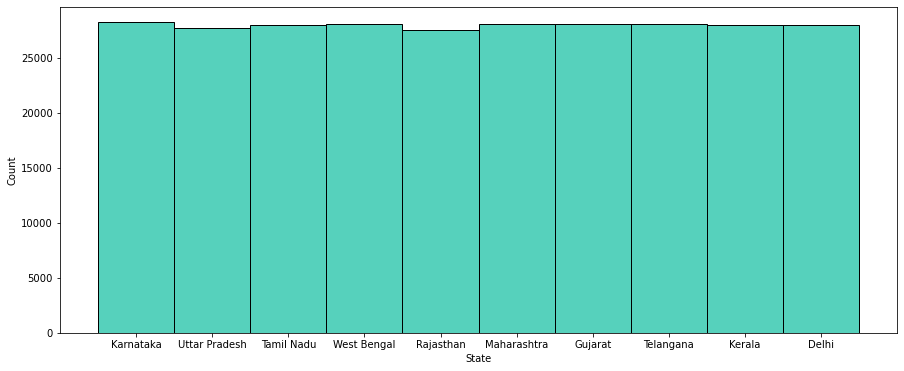

In [10]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["State"], x=df["State"], element="bars", color="#1dc2a6")

**Mostly** all states have **equal** applicants.
> The bank provides loan all over the country.

#### 2.1.1.4 City

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

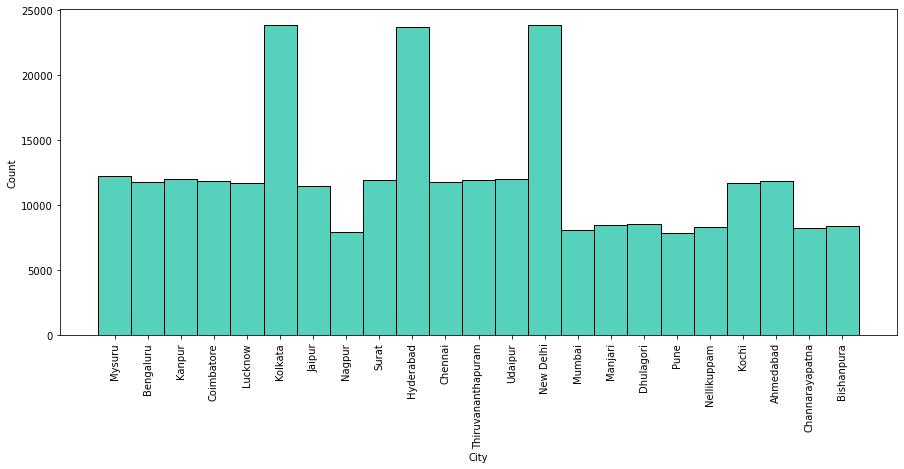

In [11]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["City"], x=df["City"], element="bars", color="#1dc2a6")
plt.xticks(rotation = 90)

**Kolkata,Hyderabad & New Delhi** have **maximum** applicants whereas **Pune** has **minimum** applicants.
> Loan providing on the basis of City has a different outcome as compared to State.

#### 2.1.1.5 Employment Profile

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

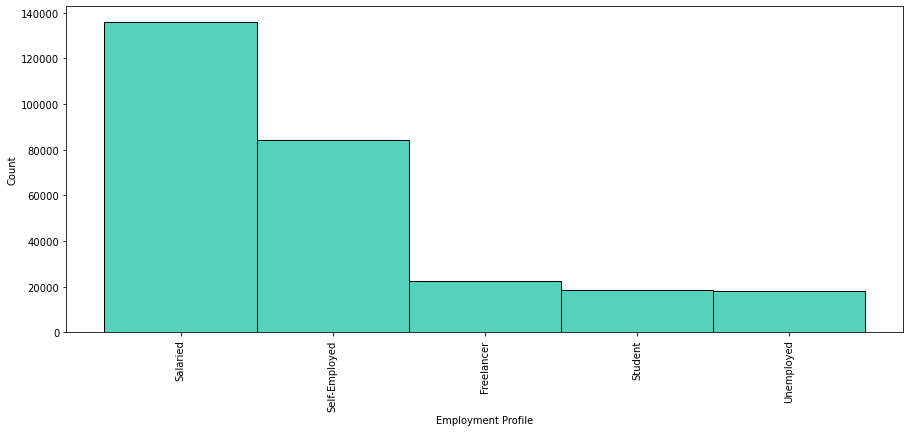

In [12]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Employment Profile"], x=df["Employment Profile"], element="bars", color="#1dc2a6")
plt.xticks(rotation = 90)

**Salaried** people are the **maximum** applicants & **Students & Unemployed** are **minimum**.
> Salaried people apply more because they have a more stable income source to repay the loan than others whereas unemployed people or students dont have any so the refrain from even applying as most of them don't even know that they might get loans on some basis .

#### 2.1.1.6 Occupation 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

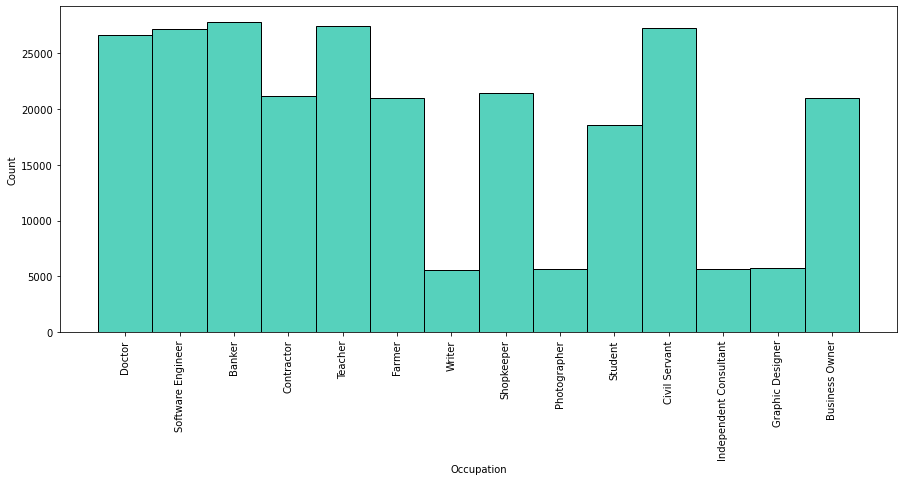

In [13]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Occupation"], x=df["Occupation"], element="bars", color="#1dc2a6")
plt.xticks(rotation = 90)

1. **Maximum** people lie in the occupation type **Banker**.
2. The next most **prominent** occupation is of **Civil Servant,Teacher,Software Engineer & Doctors**.
3. Least if of **writer,photographer,independent consultant & graphic designer**.
> Mostly **high salaried** people apply for loan and **freelancers** refrain from it.

### 2.1.3 Scope of being Categoircal

#### 2.1.3.1 Loan Amount

<AxesSubplot:xlabel='Loan Amount', ylabel='Count'>

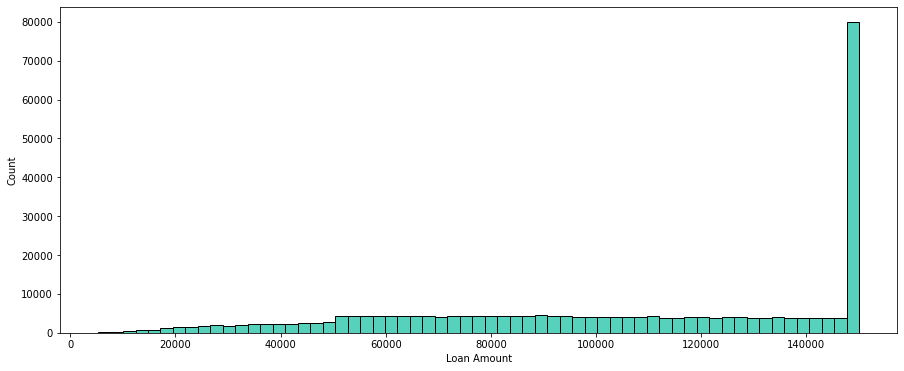

In [14]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Loan Amount"], x=df["Loan Amount"], element="bars", color="#1dc2a6")

1. This can be divided into **two catgeories**:
    * Either people have **<6000**.
    * **Or more** than that.

#### 2.1.3.2 Profile Score

<AxesSubplot:xlabel='Profile Score', ylabel='Count'>

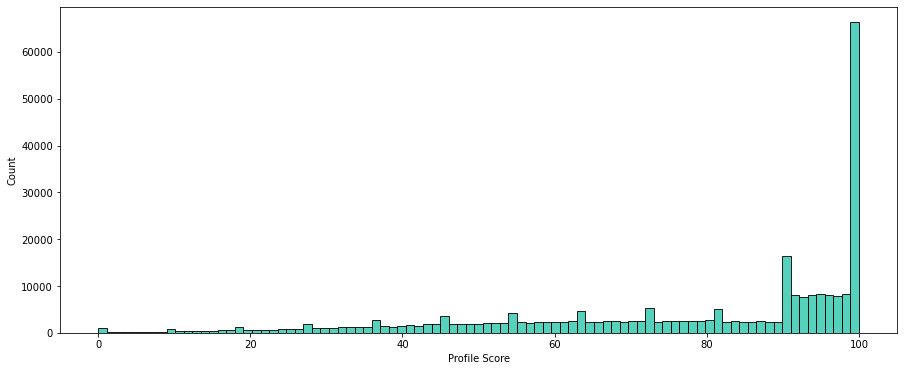

In [15]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Profile Score"], x=df["Profile Score"], element="bars", color="#1dc2a6")

1. This can be divided into **two catgeories**:
    * Either people have **less than 90**.
    * **Or more** than that.

As 2 is the mode of the data.

#### 2.1.3.3 Loan Tenure

<AxesSubplot:xlabel='Loan Tenure', ylabel='Count'>

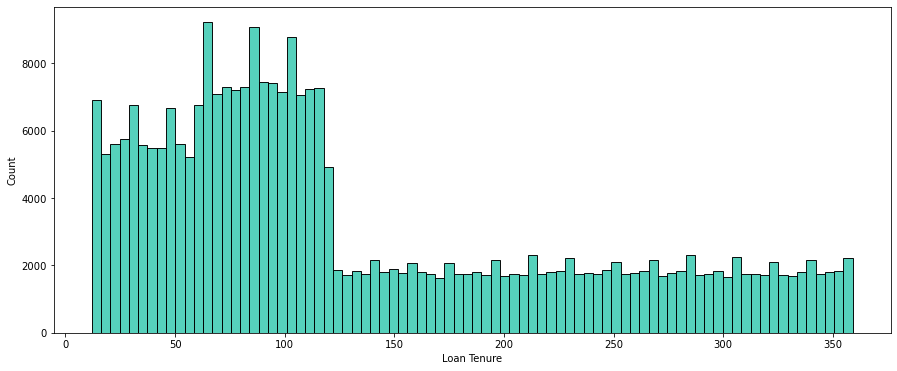

In [16]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Loan Tenure"], x=df["Loan Tenure"], element="bars", color="#1dc2a6")

1. This can be divided into **two catgeories**:
    * Either people have **<=125 months**.
    * **Or more** than that.

#### 2.1.3.4 Credit Score

<AxesSubplot:xlabel='Credit Score', ylabel='Count'>

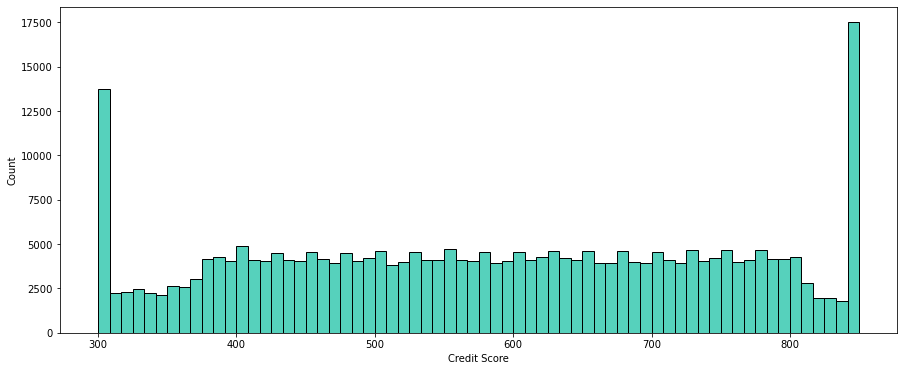

In [17]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Credit Score"], x=df["Credit Score"], element="bars", color="#1dc2a6")

1. This will be divided into **2 catgeories**:
    * Approved:**>=650**
    * Unapproved:**<650**


### 2.2.4 LTV Ratio

<AxesSubplot:xlabel='LTV Ratio', ylabel='Count'>

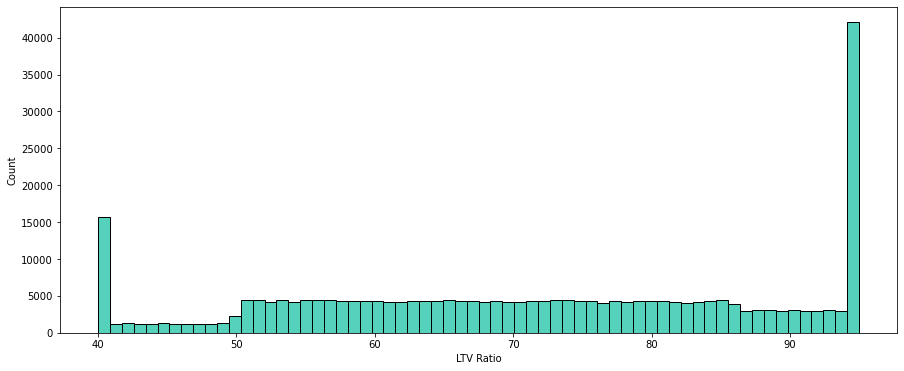

In [18]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["LTV Ratio"], x=df["LTV Ratio"], element="bars", color="#1dc2a6")

1. This can be divided into **3 catgeories**:
    * **less than 50**
    * **between 50-85**
    * **more than 85**

## 2.2 Visualising Numerical Columns

### 2.2.1 Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

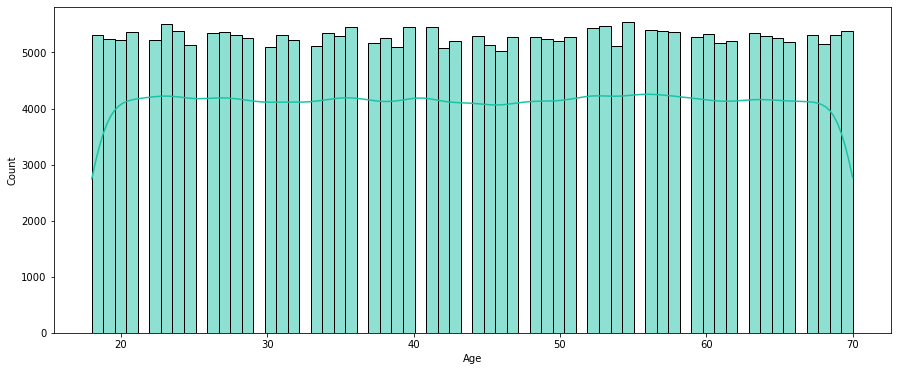

In [19]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Age"], x=df["Age"], element="bars",kde=True, color="#1dc2a6")

People of **all** age groups have applied for loan.

### 2.2.2 No. of Existing Loans

<AxesSubplot:xlabel='Number of Existing Loans', ylabel='Count'>

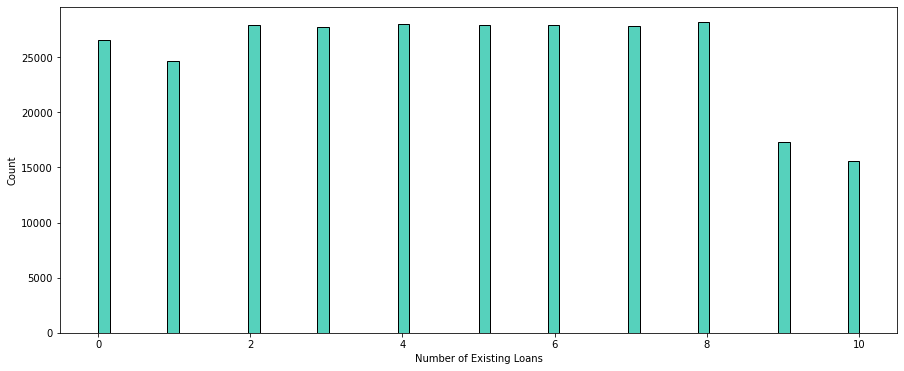

In [20]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Number of Existing Loans"], x=df["Number of Existing Loans"], element="bars", color="#1dc2a6")

Only a **few** people people have **more than 8** existing loans.

### 2.2.3 Income

<AxesSubplot:xlabel='Income', ylabel='Count'>

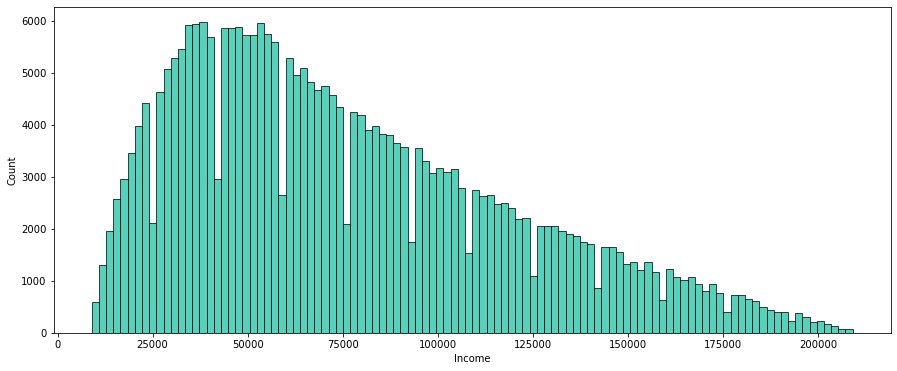

In [21]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Income"], x=df["Income"], element="bars", color="#1dc2a6")

The graph is increasing till **35000** and starts decreasing again.

### 2.2.5 Credit History Length

<AxesSubplot:xlabel='Credit History Length', ylabel='Count'>

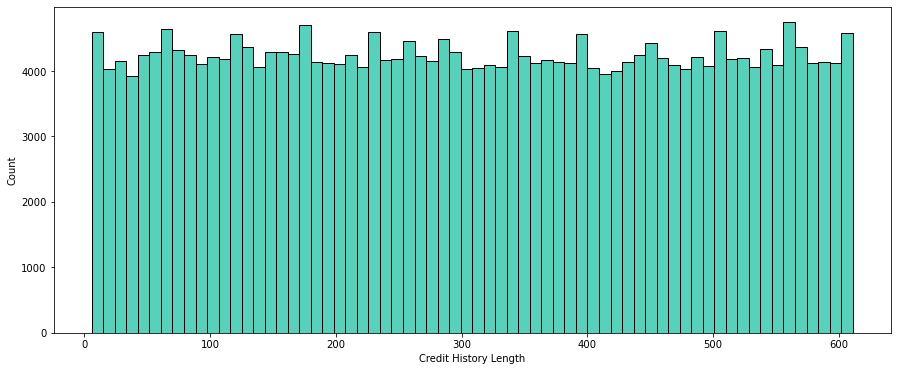

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(data=df["Credit History Length"], x=df["Credit History Length"], element="bars", color="#1dc2a6")

All the data is equally spread.

## 2.3 Visualizing Correlated Columns

### 2.3.1 Finding Correlations

<AxesSubplot:>

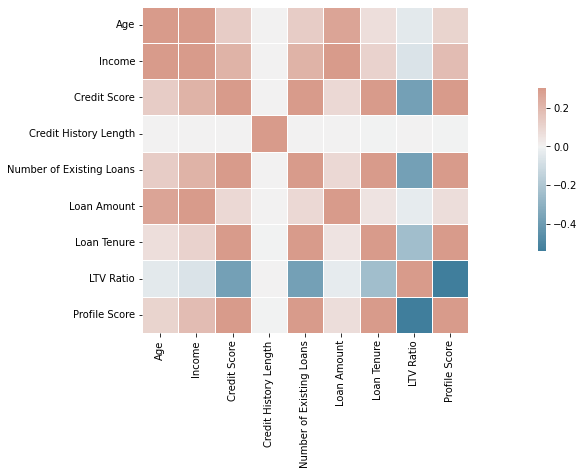

In [23]:
plt.figure(figsize=(25,6))
sns.heatmap(df.corr(),cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 2.3.2 Filtering Significant Correlations

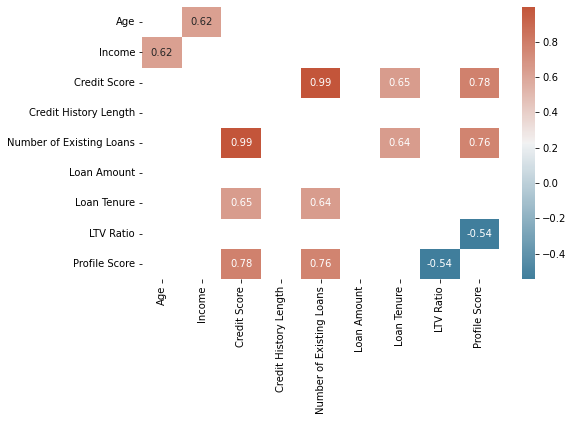

In [24]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

   1. Following are significantly positive correlating attributes with Credit Score in descending order:

    * **Number of Existing Loans**
    * **Profile Score**
    * **Loan Tenure**
    
        Attributes with values more than **0.7** can be dropped as they are of no use.

#### 2.3.2.1 Credit Score & Profile Score

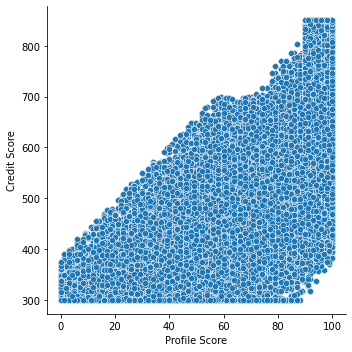

In [25]:
sns.relplot(data=df, x=df["Profile Score"], y=df["Credit Score"])

Both of the columns are highly correlated and almost same.
>It is obvious that a person having more profile score is expected to have more credit score.

#### 2.3.2.2 Credit Score & Number of Existing Loans

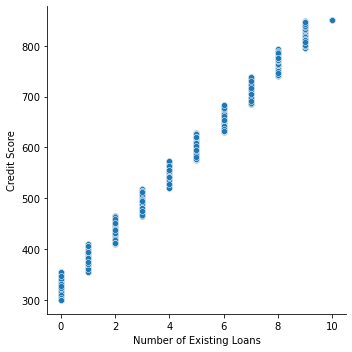

In [26]:
sns.relplot(data=df, x=df["Number of Existing Loans"], y=df["Credit Score"])

Both of the columns are highly correlated and almost same.
>It is obvious that a person having more number of existing loans is expected to have more credit score.

#### 2.3.2.3 Loan Tenure & Credit Score

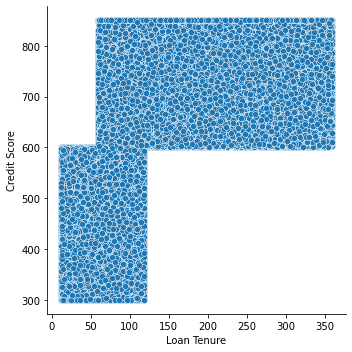

In [27]:
sns.relplot(data=df, x=df["Loan Tenure"], y=df["Credit Score"])

Both of the columns are correlated.
>It is obvious that a person having more loan tenure is expected to have more credit score.

# 3. Data pre-processing

## 3.1. Grouping columns.

In [28]:
for dataset in [df]:
    dataset.loc[dataset['Credit Score'] <= 650, 'Credit Score'] = 0
    dataset.loc[dataset['Credit Score'] > 650, 'Credit Score'] = 1

### 3.2 Checking for data types of columns

In [29]:
df.dtypes

Age                           int64
Gender                       object
Income                        int64
Credit Score                  int64
Credit History Length         int64
Number of Existing Loans      int64
Loan Amount                   int64
Loan Tenure                   int64
Existing Customer            object
State                        object
City                         object
LTV Ratio                   float64
Employment Profile           object
Profile Score                 int64
Occupation                   object
dtype: object

## 3.3 Handling Missing Values

### 3.3.1 Filling values with mode of columns

In [30]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,0,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,0,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,1,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,1,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,0,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


### 3.3.2 Checking for sum of missing values(if left)

In [31]:
df.isna().sum()

Age                         0
Gender                      0
Income                      0
Credit Score                0
Credit History Length       0
Number of Existing Loans    0
Loan Amount                 0
Loan Tenure                 0
Existing Customer           0
State                       0
City                        0
LTV Ratio                   0
Employment Profile          0
Profile Score               0
Occupation                  0
dtype: int64

## 3.4 Encoding Columns

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [33]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Occupation"] = le.fit_transform(df["Occupation"])
df["Existing Customer"] = le.fit_transform(df["Existing Customer"])
df["State"] = le.fit_transform(df["State"])
df["City"] = le.fit_transform(df["City"])
df["Employment Profile"] = le.fit_transform(df["Employment Profile"])
df = df.astype(int)

## 3.5 Checking data types

In [34]:
df.dtypes

Age                         int64
Gender                      int64
Income                      int64
Credit Score                int64
Credit History Length       int64
Number of Existing Loans    int64
Loan Amount                 int64
Loan Tenure                 int64
Existing Customer           int64
State                       int64
City                        int64
LTV Ratio                   int64
Employment Profile          int64
Profile Score               int64
Occupation                  int64
dtype: object

All columns have been converted to the same data type.

# 4. Model Development & Classification

## 4.1 Data preparation

We will **drop** the following columns as they have little to no contribution in variance of dataset as per the inference by PCA.

In [35]:
X= df.drop(['Credit Score','State', 'City','Age','Gender','LTV Ratio','Credit History Length','Profile Score','Existing Customer','Employment Profile'],axis=1)
y=df['Credit Score']

## 4.2 Training the dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [38]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (156719, 5)(156719,)
Validation dataset: (39180, 5)(39180,)
Test dataset: (83957, 5)(83957,)


## 4.3 Model Developement

### 4.3.1 Initiating the model

In [39]:
models = []
names = ['Random Forest','GaussianNB','DecisionTreeClassifier','Adaboost','Xgboost','LGBM']

models.append((RandomForestClassifier(n_estimators=100)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((AdaBoostClassifier()))
models.append((xgb.XGBClassifier()))
models.append((ltb.LGBMClassifier()))

### 4.3.2 Cross-vaildating models & choosing best fit.

In [40]:
kfold = KFold(n_splits=5)
for i in range(0,len(models)):    
    cv_result = cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
Random Forest: 0.989509954058193
----------------------------------------
GaussianNB: 0.9170239918325677
----------------------------------------
DecisionTreeClassifier: 0.9888973966309341
----------------------------------------
Adaboost: 0.9611536498213374
----------------------------------------
Xgboost: 0.9712608473711077
----------------------------------------
LGBM: 0.9661306789178152


**Random Forest Classifier** gets selected as it has the **maximum accuracy score**.

## 4.4 Testing the dataset

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.9891015638958038
----------------------------------------
Confusion Matrix:
[[51554   612]
 [  303 31488]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52166
           1       0.98      0.99      0.99     31791

    accuracy                           0.99     83957
   macro avg       0.99      0.99      0.99     83957
weighted avg       0.99      0.99      0.99     83957



# 5. Saving the model

In [42]:
filename='final_model.sav'
joblib.dump(rf,filename)

['final_model.sav']